# Credit Card Retention Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [3]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [4]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

***

## Ridge Plot

In [ ]:
bins = [0, 11000, 900000]
labels = ['Group 1', 'Group 2']
data['Total_Trans_Amt_bin'] = pd.cut(data['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True, right=False)

pd.cut(data['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest= True, right=False)

0        Group 1
1        Group 1
2        Group 1
3        Group 1
4        Group 1
          ...   
10122    Group 2
10123    Group 1
10124    Group 1
10125    Group 1
10126    Group 1
Name: Total_Trans_Amt, Length: 10127, dtype: category
Categories (2, object): ['Group 1' < 'Group 2']

In [6]:
data.groupby(['Total_Trans_Amt_bin', 'Attrition_Flag']).agg({
     'CLIENTNUM':'nunique',
    'Customer_Age': 'mean', 
    'Dependent_count': 'mean',
    'Months_on_book': 'mean',
    'Total_Relationship_Count': 'mean',
    'Months_Inactive_12_mon': 'mean',
    'Contacts_Count_12_mon': 'mean',
    'Credit_Limit': 'mean',
    'Total_Revolving_Bal': 'mean',
    'Avg_Open_To_Buy': 'mean',
    'Total_Amt_Chng_Q4_Q1': 'mean',
    'Total_Trans_Amt': 'mean',
    'Total_Trans_Ct': 'mean',
    'Total_Ct_Chng_Q4_Q1': 'mean',
    'Avg_Utilization_Ratio': 'mean'
}).T

KeyError: 'Total_Trans_Amt_bin'

Earlier, we had highlighted the following variables that showed differences between Churned and Existing customers:

    1) Total_Revolving_Bal (still a good indicator)
    2) Avg_Utilization_Ratio (not good anymore, since attrited and existing have similar values)
    3) Total_Trans_Ct (still a good indicator)
    4) Total_Trans_Amt (not good anymore, since attrited and existing have similar values)

More about KDE plots, see [here](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) and [here](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde).

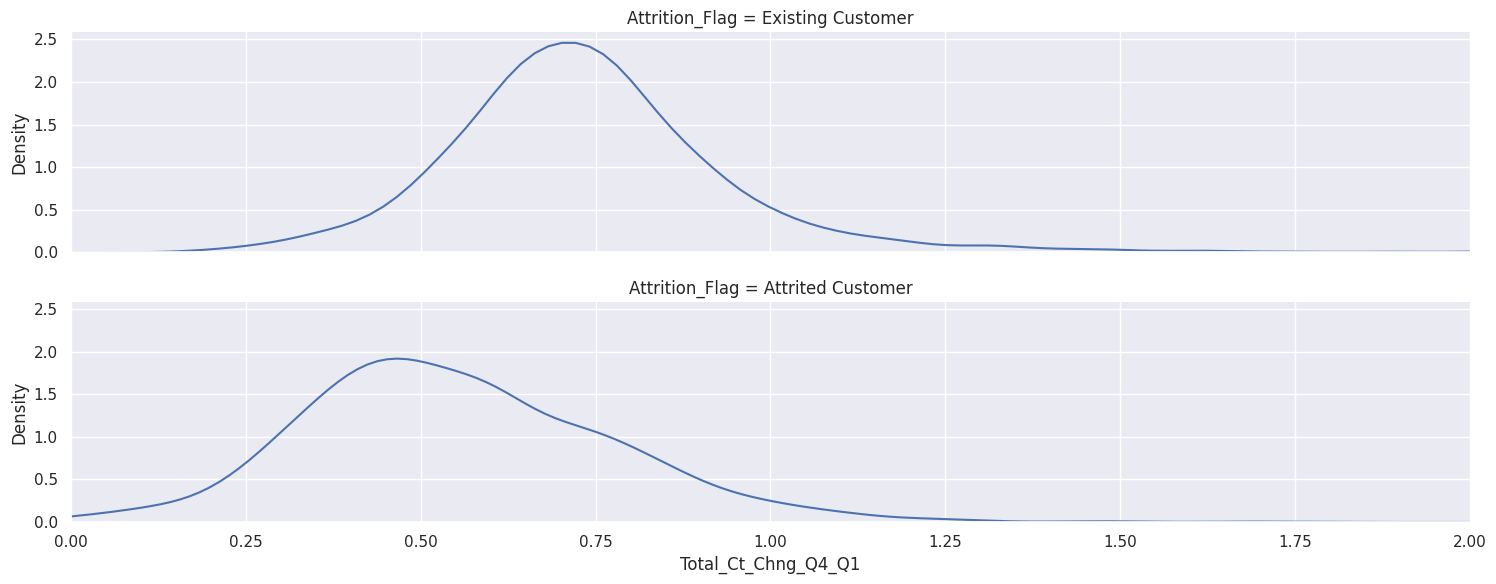

In [7]:
g = sns.FacetGrid(data, row="Attrition_Flag", aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1")

plt.xlim(0,2);